In [8]:
#data set https://www.kaggle.com/slothkong/10-monkey-species

from keras import applications, optimizers, backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPooling2D, Conv2D
from keras.utils import np_utils
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import tensorflow as tf
# from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from imageio import imread
from skimage.transform import resize


import os

In [9]:
img_width, img_height = 150, 150
train_data_dir = "10-monkey-species/training"
validation_data_dir = "10-monkey-species/validation"

class_names = [
    'mantled_howler',
    'patas_monkey',
    'bald_uakari',
    'japanese_macaque',
    'pygmy_marmoset',
    'white_headed_capuchin',
    'silvery_marmoset',
    'common_squirrel_monkey',
    'black_headed_night_monkey',
    'nilgiri_langur'
]
classes = []
train_features = []
train_labels = []
class_index = 0

print('Entering')

for folder_name in os.listdir(train_data_dir): #folder name is also class name
    folder_image_dir = train_data_dir+'/'+folder_name
    for files in os.listdir(folder_image_dir):
        image_data_file = train_data_dir+'/'+folder_name+'/'+files
#         image = mpimg.imread(image_data_file) #Matplot image read
        image = imread(image_data_file) # scipy read
        image = np.array(image)
        image = image/255
#         image = tf.image.resize_images(image, [img_width, img_height])
        image = resize(image, [img_width, img_height])
#         image = np.ndarray.flatten(image)
        train_features.append(image)
        train_labels.append(class_index)
    class_index+=1
    classes.append(folder_name)
#         break
    print(folder_name, 'is finished')
    
val_classes = []
x_test = []
y_test = []
val_class_index = 0
for folder_name in os.listdir(validation_data_dir): #folder name is also class name
    folder_image_dir = validation_data_dir+'/'+folder_name
    for files in os.listdir(folder_image_dir):
        image_data_file = validation_data_dir+'/'+folder_name+'/'+files
#         image = mpimg.imread(image_data_file) #Matplot image read
        image = imread(image_data_file) # scipy read
        image = np.array(image)
        image = image/255
#         image = tf.image.resize_images(image, [img_width, img_height])
        image = resize(image, [img_width, img_height])
#         image = np.ndarray.flatten(image)
        x_test.append(image)
        y_test.append(val_class_index)
    val_class_index+=1
    val_classes.append(folder_name)
#         break
    print(folder_name, 'is finished')

Entering


c:\users\jet\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\jet\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


n0 is finished
n1 is finished
n2 is finished
n3 is finished
n4 is finished
n5 is finished
n6 is finished
n7 is finished
n8 is finished
n9 is finished
n0 is finished
n1 is finished
n2 is finished
n3 is finished
n4 is finished
n5 is finished
n6 is finished
n7 is finished
n8 is finished
n9 is finished


In [10]:
# np.random.seed(123)
# np.random.shuffle(train_features)
# np.random.shuffle(train_labels)

In [11]:
train_features = np.array(train_features) #Need to do this to prevent "Expected to see 1 arrays()
# train_labels = np_utils.to_categorical(train_labels)  #conver to one hot encoded classes

print(np.shape(train_features))
print(np.shape(train_labels))

(1098, 150, 150, 3)
(1098,)


In [12]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '' #disable gpu usage momentarily

# model = applications.ResNet50(weights = "imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# for layer in model.layers[-1:]:
#     layer.trainable = False
    
# x = model.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(len(classes), activation='softmax')(x) # should be number of classes
# model = Model(input = model.input, output = predictions)

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same'),
    Conv2D(64, (3, 3), activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
#     Flatten(input_shape=(img_width, img_height,3)),
    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.5),
    Dense(len(classes), activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from keras.utils import plot_model
plot_model(model, to_file='model.png')

Epoch 1/50
1098/1098 [==============================] - 2s 2ms/step - loss: 2.2788 - acc: 0.1275
Epoch 2/50
1098/1098 [==============================] - 1s 1ms/step - loss: 1.9475 - acc: 0.3106
Epoch 3/50
1098/1098 [==============================] - 1s 1ms/step - loss: 1.6308 - acc: 0.4217
Epoch 4/50
1098/1098 [==============================] - 1s 1ms/step - loss: 1.3958 - acc: 0.5146
Epoch 5/50
1098/1098 [==============================] - 1s 1ms/step - loss: 1.1649 - acc: 0.5893
Epoch 6/50
1098/1098 [==============================] - 1s 1ms/step - loss: 1.0224 - acc: 0.6421
Epoch 7/50
1098/1098 [==============================] - 1s 1ms/step - loss: 0.7930 - acc: 0.7304
Epoch 8/50
1098/1098 [==============================] - 2s 1ms/step - loss: 0.5450 - acc: 0.8115
Epoch 9/50
1098/1098 [==============================] - 1s 1ms/step - loss: 0.5139 - acc: 0.8197
Epoch 10/50
1098/1098 [==============================] - 1s 1ms/step - loss: 0.4618 - acc: 0.8461
Epoch 11/50
1098/1098 [======

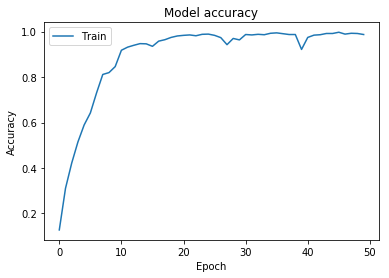

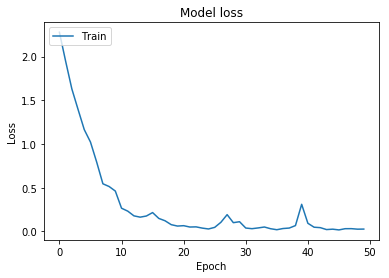

In [13]:
# model.fit(train_features, train_labels, epochs=200)

# history = model.fit(train_features, train_labels, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
history = model.fit(train_features, train_labels, epochs=50, verbose=1, shuffle=True)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
x_test = np.array(x_test) #Need to do this to prevent "Expected to see 1 arrays()
# y_test = np_utils.to_categorical(y_test)  #conver to one hot encoded classes

print(np.shape(y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

(272,)
272/272 [==============================] - 0s 952us/step
Test accuracy: 0.6397058823529411
